Importing required Libraries 

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('Data Sets\student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [94]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

(395, 33)

In [95]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

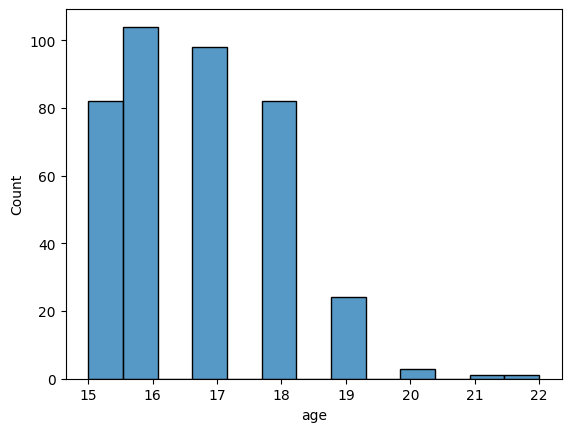

In [96]:
sns.histplot(df['age'])

sex
F    208
M    187
Name: count, dtype: int64

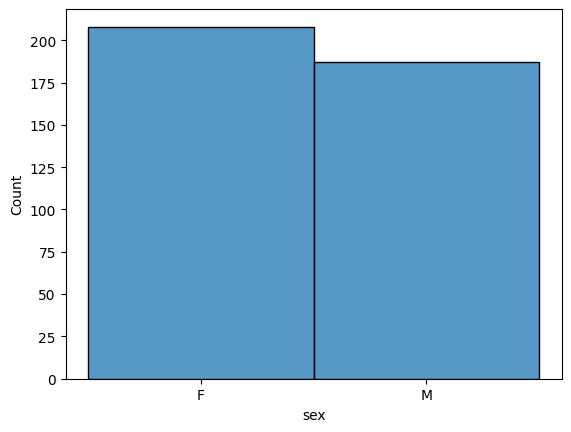

In [97]:
sns.histplot(df['sex'])
pd.value_counts(df['sex'])

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

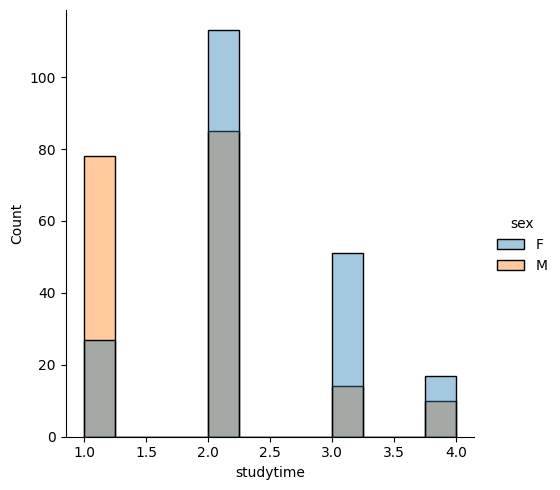

In [98]:
plt.figure(figsize=(10, 5))
sns.displot(data = df, x = 'studytime', hue='sex', alpha=0.4)

girlsStudyTime = df[df['sex'] == 'F']['studytime']
girlsStudyTimeMean = girlsStudyTime.mean()

boysStudyTime = df[df['sex'] == 'M']['studytime']
boysStudyTimeMean = boysStudyTime.mean()


In [99]:

print(girlsStudyTimeMean)
print(boysStudyTimeMean)


2.2788461538461537
1.7647058823529411


In [100]:
df['studytime'].dtype

dtype('int64')

Making a column for average test score

In [101]:
df['avgscore'] = (df['G1'] + df['G2'] + df['G3'])/3
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.666667


In [102]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avgscore'],
      dtype='object')

<Axes: xlabel='studytime', ylabel='avgscore'>

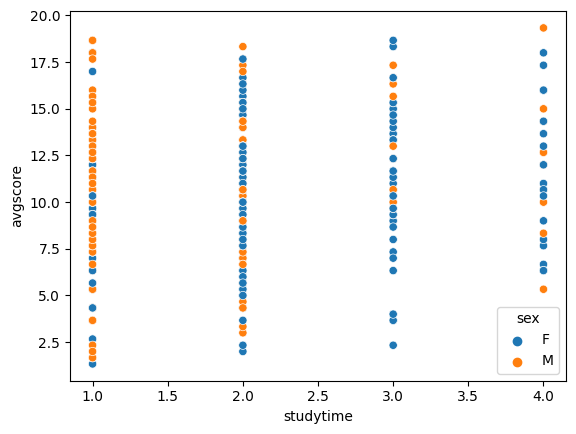

In [103]:
sns.scatterplot(data = df, y = 'avgscore', x = 'studytime', hue='sex')

more no of girls take schoolup


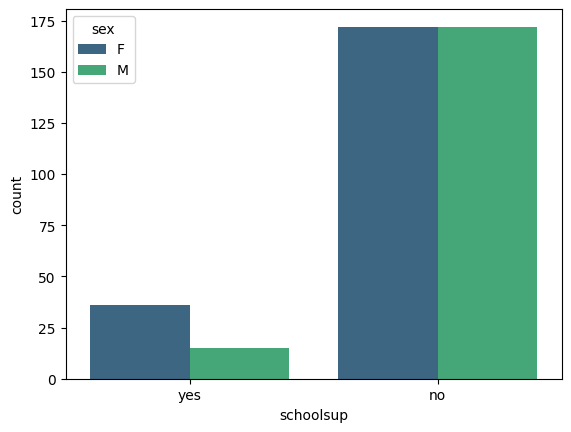

In [104]:
sns.countplot(data = df, x = 'schoolsup', hue = 'sex', palette = 'viridis')
print("more no of girls take schoolup")

Which age group and gender is consuming more alcohol

<Axes: xlabel='age', ylabel='Dalc'>

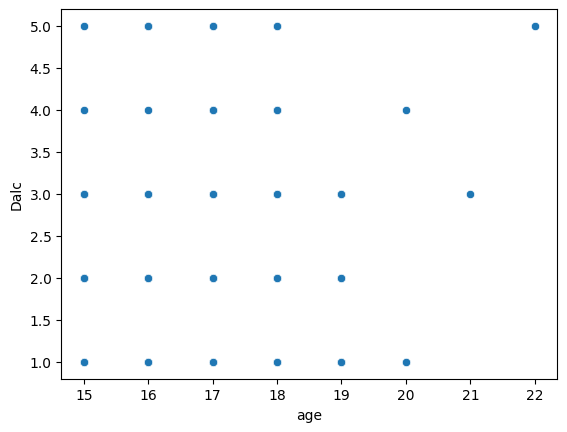

In [105]:
sns.scatterplot(data = df, x = 'age', y ='Dalc')

In [106]:
string_columns = df.select_dtypes(include=['object'])

# Get the names of columns with data type "string"
string_column_names = string_columns.columns.tolist()
print(string_column_names)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


<Axes: >

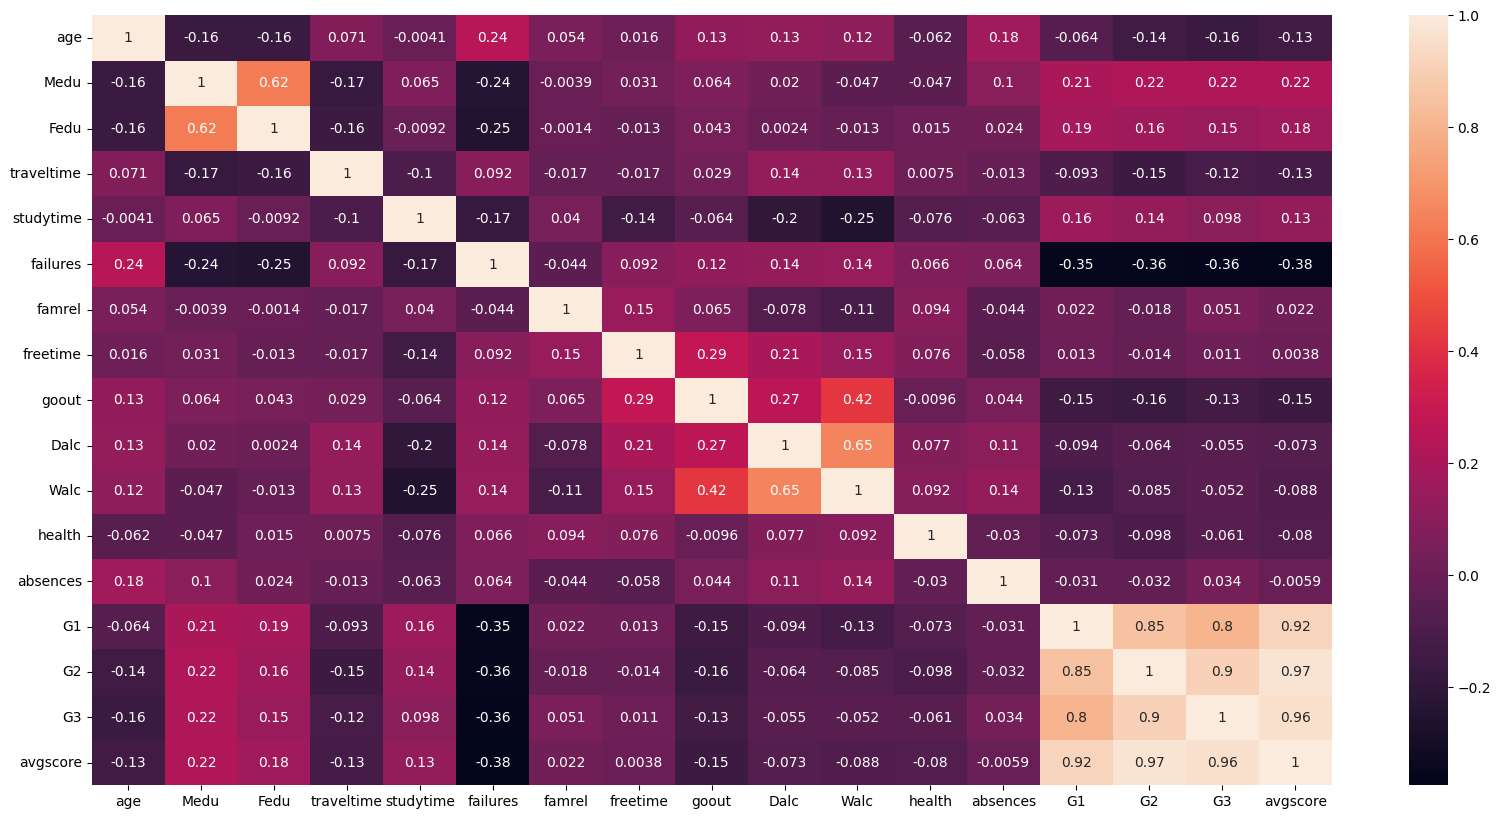

In [107]:
# find corrleation and igrnore the non-numeric columns
corrMatrix = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True)

In [108]:
corrMatrix['avgscore'].sort_values()

failures     -0.375759
goout        -0.154511
age          -0.134589
traveltime   -0.128197
Walc         -0.088025
health       -0.080380
Dalc         -0.072508
absences     -0.005909
freetime      0.003773
famrel        0.021653
studytime     0.134565
Fedu          0.175852
Medu          0.224260
G1            0.919386
G3            0.959873
G2            0.967999
avgscore      1.000000
Name: avgscore, dtype: float64

After normalization of data

In [109]:
# import minmax from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()
normalized_data = scaler.fit_transform(numeric_df)

# Convert the scaled data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_df.columns)

<Axes: >

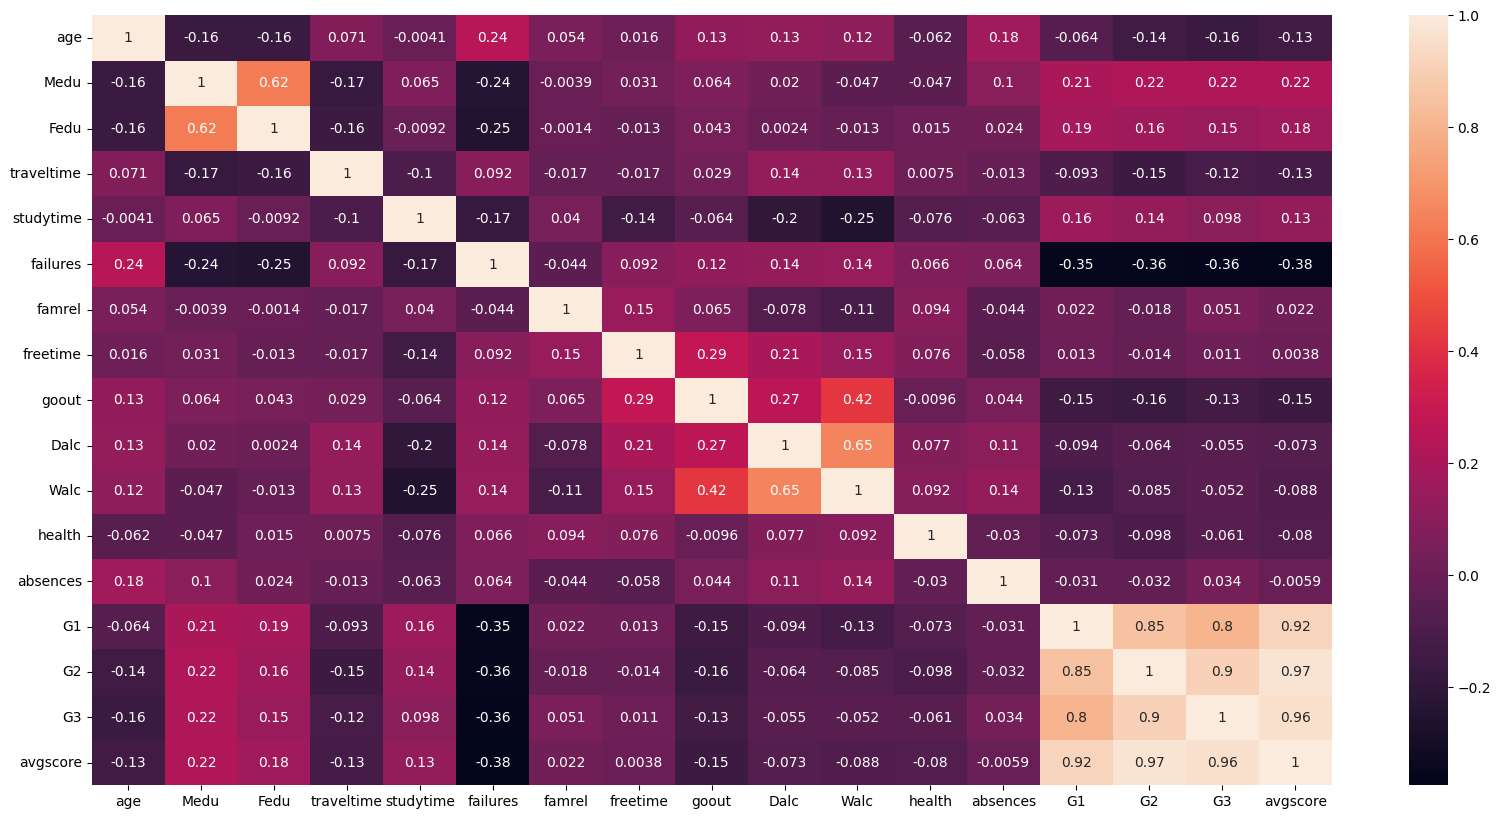

In [111]:

normalized_corr_matrix = normalized_df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(normalized_corr_matrix, annot=True)


In [112]:
normalized_corr_matrix['avgscore'].sort_values()

failures     -0.375759
goout        -0.154511
age          -0.134589
traveltime   -0.128197
Walc         -0.088025
health       -0.080380
Dalc         -0.072508
absences     -0.005909
freetime      0.003773
famrel        0.021653
studytime     0.134565
Fedu          0.175852
Medu          0.224260
G1            0.919386
G3            0.959873
G2            0.967999
avgscore      1.000000
Name: avgscore, dtype: float64

Both normalized and simple corrleation matrix without normlizatino are equal 

In [113]:
medug1 = corrMatrix['Medu']['G1']
fedug1 = corrMatrix['Fedu']['G1']
studtimeG1 = corrMatrix['studytime']['G1']
g2ong1 = corrMatrix['G2']['G1']
print("Correlations of important variables on G1 scores\n")
print("Mother education on G1 score = " + str(round(medug1,2)))
print("Father education on G1 score = " + str(round(fedug1,2)))
print("Study time on G1 score = " + str(round(studtimeG1,2)))
print("G2score on G1 score = " + str(round(g2ong1,2)))

Correlations of important variables on G1 scores

Mother education on G1 score = 0.21
Father education on G1 score = 0.19
Study time on G1 score = 0.16
G2score on G1 score = 0.85


In [114]:
df.select_dtypes('object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [115]:
#do one hot incoding for column schoolups
dummies_df = pd.get_dummies(df['activities'],dtype=int)
dummies_df.columns = ['activities_no','activities_yes']
df = pd.concat([df,dummies_df],axis=1)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_no,activities_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,1,0


In [116]:

df.drop('activities_no', axis=1, inplace=True)

In [117]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,0


In [118]:
(df['activities'] == 'yes').value_counts()

activities
True     201
False    194
Name: count, dtype: int64

In [119]:

numeric_df = pd.concat([numeric_df, df['activities_yes']], axis=1)

In [120]:
numeric_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,5.666667,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,5.333333,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,8.333333,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,14.666667,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,8.666667,0


In [121]:
corr_matrix_activities_yes = numeric_df.corr()
corr_matrix_activities_yes["activities_yes"].sort_values(ascending=True)

age              -0.103063
failures         -0.069341
Dalc             -0.066508
Walc             -0.037477
absences         -0.013610
traveltime       -0.007766
G3                0.016100
health            0.023923
famrel            0.040687
avgscore          0.040859
goout             0.046088
G2                0.050552
G1                0.057010
freetime          0.089728
studytime         0.089877
Medu              0.108277
Fedu              0.112643
activities_yes    1.000000
Name: activities_yes, dtype: float64

Mothers and fathers education tend to positives affect the activities of students
Age negatively affect the activities of the students



In [122]:
corr_matrix_activities_yes['freetime'].sort_values(ascending=True)

studytime        -0.143198
absences         -0.058078
traveltime       -0.017025
G2               -0.013777
Fedu             -0.012846
avgscore          0.003773
G3                0.011307
G1                0.012613
age               0.016434
Medu              0.030891
health            0.075733
activities_yes    0.089728
failures          0.091987
Walc              0.147822
famrel            0.150701
Dalc              0.209001
goout             0.285019
freetime          1.000000
Name: freetime, dtype: float64

More free time means more the possibility of drinking daily and going out. It effect negativly for studytime

In [123]:
df['romantic'].value_counts()

romantic
no     263
yes    132
Name: count, dtype: int64

In [124]:
in_relationship_avg = df[df['romantic'] == 'yes']['avgscore'].mean()
not_in_relationship_avg = df[df['romantic'] == 'no']['avgscore'].mean()

print('Average score of students in relationship: ', in_relationship_avg)
print('Average score of students not in relationship: ', not_in_relationship_avg)

Average score of students in relationship:  10.143939393939394
Average score of students not in relationship:  10.94803548795944


Converting the relationship categorical varibles to numeric

In [125]:
dummies_df = pd.get_dummies(df['romantic'],dtype=int)
dummies_df.columns = ['romantic_no','romantic_yes']
df = pd.concat([df,dummies_df],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_no,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.666667,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.333333,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.333333,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.666667,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,8.666667,0,1,0


In [126]:
df.drop('romantic_no', axis=1,inplace=True)

In [127]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,0,0


Using Spearman correlation coff because dealing with ordinal and continuous data

<Axes: >

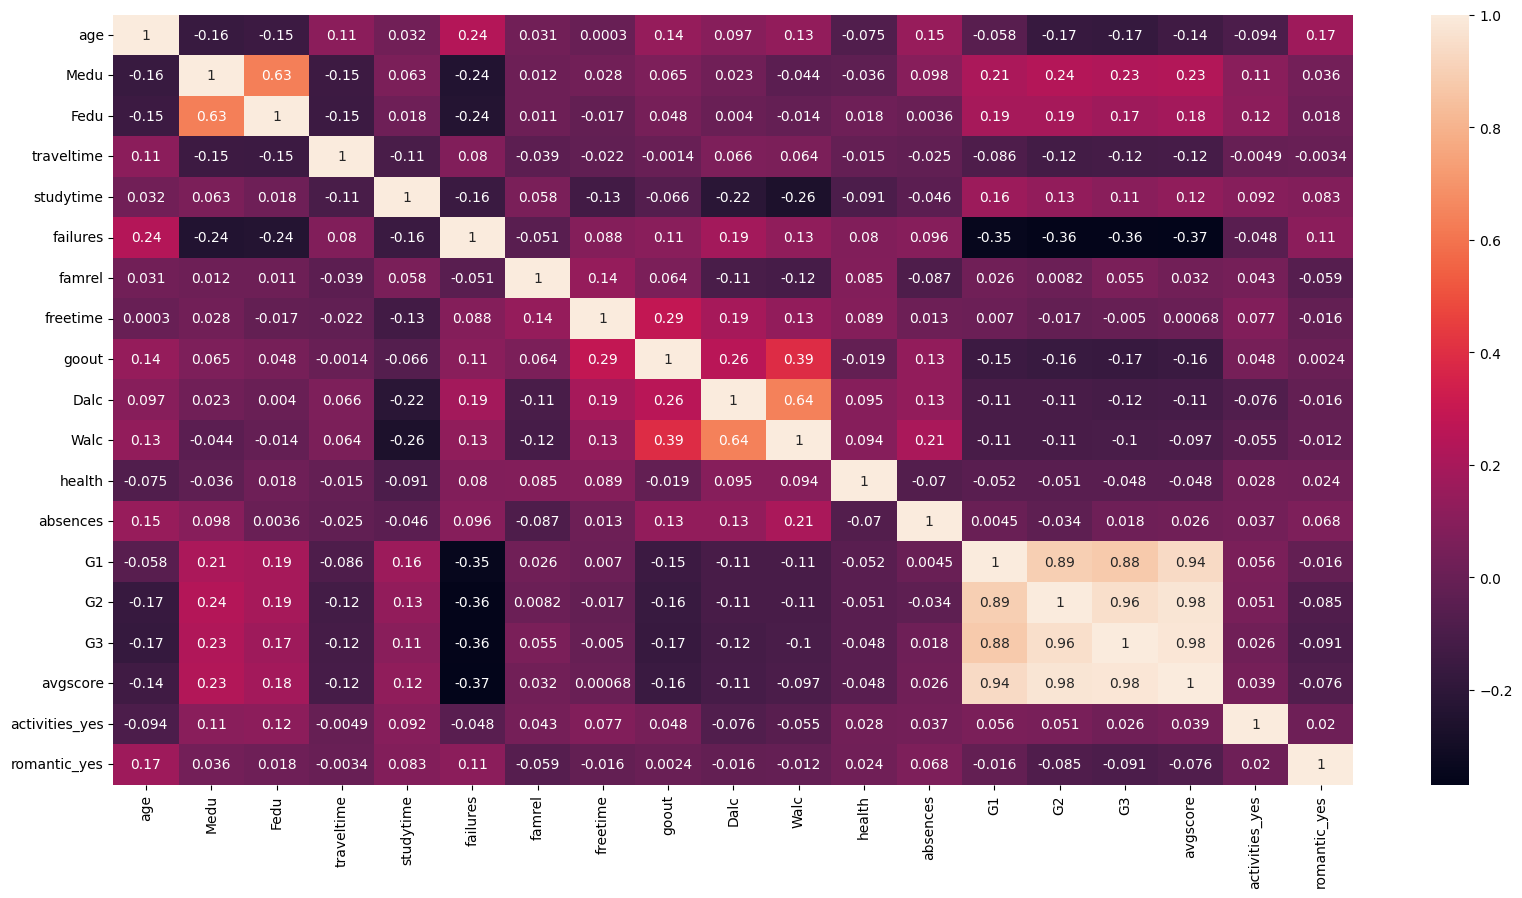

In [128]:
corrMatrix_romantic_yes = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatrix_romantic_yes, annot=True)

In [129]:
corrMatrix_romantic_yes['romantic_yes'].sort_values(ascending=True)

G3               -0.091460
G2               -0.084542
avgscore         -0.076123
famrel           -0.058508
freetime         -0.016358
Dalc             -0.016063
G1               -0.015925
Walc             -0.012221
traveltime       -0.003393
goout             0.002411
Fedu              0.018003
activities_yes    0.019651
health            0.024460
Medu              0.036035
absences          0.068400
studytime         0.082682
failures          0.109715
age               0.167957
romantic_yes      1.000000
Name: romantic_yes, dtype: float64

avgscore corr is -0.076123 which is very less. and again by comparing the avg of relation with non relation students we can confirm that it does not effect much for average marks

In [130]:
df[df['romantic'] == 'yes']['avgscore'].std()

3.6944800265204085

In [131]:
df[df['romantic'] == 'no']['avgscore'].std()

3.6755968262678307

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21148\2761222604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['romantic'] == 'yes']['avgscore'], color='blue')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21148\2761222604.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['romantic']

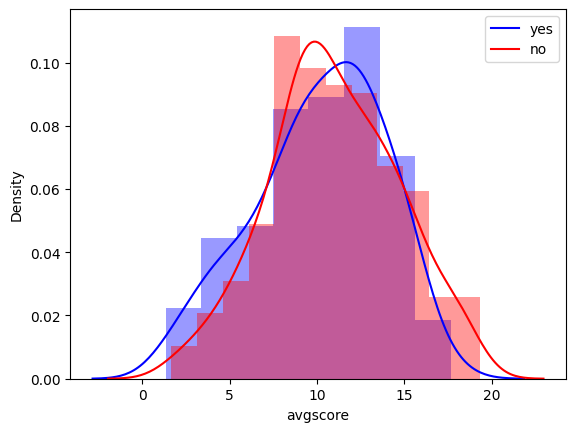

In [132]:
sns.distplot(df[df['romantic'] == 'yes']['avgscore'], color='blue')
sns.distplot(df[df['romantic'] == 'no']['avgscore'], color='red')
plt.legend(['yes', 'no'])

Doing some testing below to understand more no of toppers come from which group of relationship

In [133]:
from scipy.stats import chi2_contingency

In [134]:
total_no_students = 263
total_yes_students = 132

print("toppers in relation ",(df[df['romantic'] == 'yes']['avgscore'] > 15).sum())
print("toppers not in relation ",(df[df['romantic'] == 'no']['avgscore'] > 15).sum())
toppers_no = (df[df['romantic'] == 'no']['avgscore'] > 15).sum()
toppers_yes = (df[df['romantic'] == 'yes']['avgscore'] > 15).sum()


toppers in relation  9
toppers not in relation  38


In [135]:
import numpy as np

In [136]:
observed = np.array([[toppers_no, total_no_students - toppers_no],
                     [toppers_yes, total_yes_students - toppers_yes]])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-squared value:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Chi-squared value: 4.1807491410898105
P-value: 0.04088562444806971
The difference is statistically significant.


The above observation show that the statistical significant is there after the chi squared test.
So something non random is happening here.
We can conclude that more no of toppers come from the non romantic background

In [137]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,0,0


In [138]:
#plot the no of students who draink daily hue should be address 
df['address'].value_counts() 

address
U    307
R     88
Name: count, dtype: int64

In [139]:
df_dummies = pd.get_dummies(df['address'], dtype= int)
df_dummies.columns = ['R_yes', 'U_yes']
df_dummies.head()
df = pd.concat([df, df_dummies['U_yes']], axis=1)


In [140]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,avgscore,activities_yes,romantic_yes,U_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.666667,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.333333,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.333333,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.666667,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,8.666667,0,0,1


In [141]:
corr_matrix_U_yes = df.corr(method='spearman', numeric_only=True)
corr_matrix_U_yes['U_yes'].sort_values(ascending=True)

traveltime       -0.310630
age              -0.157163
Dalc             -0.115796
Walc             -0.105167
failures         -0.095653
activities_yes   -0.051360
absences         -0.040816
health           -0.038796
studytime        -0.012873
romantic_yes      0.005257
famrel            0.020887
freetime          0.023613
Fedu              0.074736
G1                0.074995
goout             0.077085
avgscore          0.113196
G3                0.119457
G2                0.127389
Medu              0.142166
U_yes             1.000000
Name: U_yes, dtype: float64

Now Prediction
1. Linear regression

<Axes: xlabel='failures', ylabel='G1'>

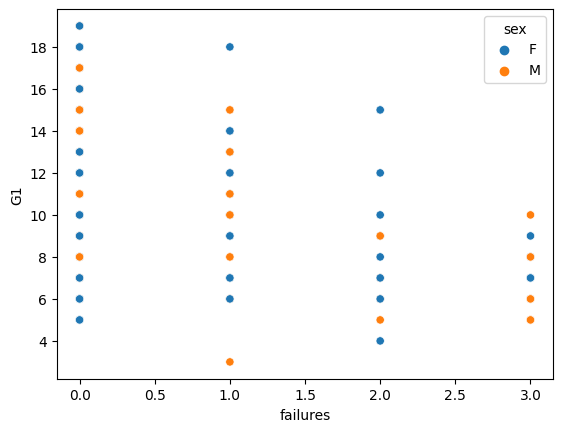

In [142]:
sns.scatterplot(x='failures', y = 'G1', data = df, hue = 'sex')

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


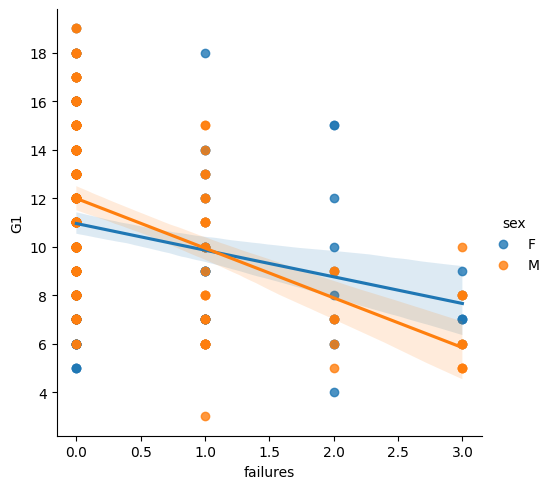

In [143]:
sns.lmplot(x='failures', y = 'G1', data = df, hue = 'sex')

In [144]:
X = df['Dalc']
y = df['G1']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)


In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)

In [206]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, prediction)
# print("R2 score: ", r2)

array([-0.22576607])

In [207]:
predictions = lm.predict(X_test)

In [208]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)

R2 score:  0.007306981383068956


In [216]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(df['Dalc']).reshape((-1, 1))
y = df['G1']
model.fit(x,y)
r2 = model.score(x,y)
print(r2)
print("Coeff of determination: " + str(round(r2,4)))

0.008865878090235535
Coeff of determination: 0.0089


Multiple Linear Regression

In [213]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avgscore',
       'activities_yes', 'romantic_yes', 'U_yes'],
      dtype='object')

In [214]:
# x2 = df[['Medu', 'Fedu']]
# y2 = df['G1']
# x2 = np.array(x2).reshape(-1, 2)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=.3, random_state=101)
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# r2 = r2_score(y_test, prediction)
# print("R2 score: ", r2)

Support vector regression

In [225]:
#model creation --> SVR was our best in preliminary
from sklearn import svm
model_main = svm.SVR()
from sklearn.model_selection import train_test_split
#df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')

#REMOVING ALL STUDENTS WHO GOT A O on FINAL EXAM
df = df[df['G3'] != 0]
X = df[['G1', 'G2', 'Fedu', 'Medu', 'failures']]
y = df['G3']

#SUPPORT VECTOR REGRESSION
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
model_main = model_main.fit(X_train, y_train)
y_pred = model_main.predict(X_test).reshape(-1,1)
model_main.score(X_test, y_test)

0.92789687802512

In [ ]:
0.9288949140132693